In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
import PIL

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pathlib
data_dir = '/content/drive/MyDrive/images/'


data_dir = pathlib.Path(data_dir).with_suffix('')

image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)


15921


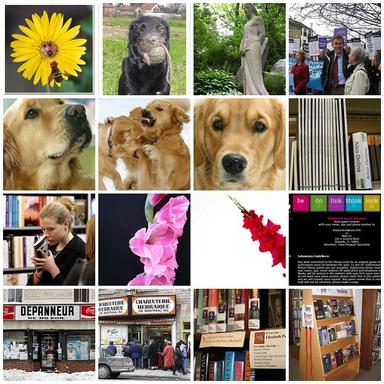

In [ ]:
angry = list(data_dir.glob('angry/*'))
PIL.Image.open(str(angry[3]))

In [ ]:
batch_size=32
img_height = 384
img_width = 384


train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='training',
    seed=123,
    image_size = (img_height,img_width),
    batch_size=batch_size
)

Found 15921 files belonging to 4 classes.
Using 12737 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.3,
    subset='validation',
    seed=123,
    image_size = (img_height,img_width),
    batch_size=batch_size
)

Found 15921 files belonging to 4 classes.
Using 4776 files for validation.


In [ ]:
num_of_classes = len(train_ds.class_names)


normalization_layer = layers.Rescaling(1./255)

normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x),y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]

print(np.min(first_image), np.max(first_image))

0.0 1.0


In [ ]:
model = Sequential([
    layers.Rescaling(1./255.0, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(num_of_classes)
])

In [ ]:
model.compile(optimizer='adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
399/399 [==============================] - 2764s 7s/step - loss: 1.3034 - accuracy: 0.3871 - val_loss: 1.2898 - val_accuracy: 0.3922
Epoch 2/10
130/399 [========>.....................] - ETA: 28:08 - loss: 1.3057 - accuracy: 0.3877

In [ ]:
import matplotlib.pyplot as plt

In [ ]:

epochs=10
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
from tensorflow import keras
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

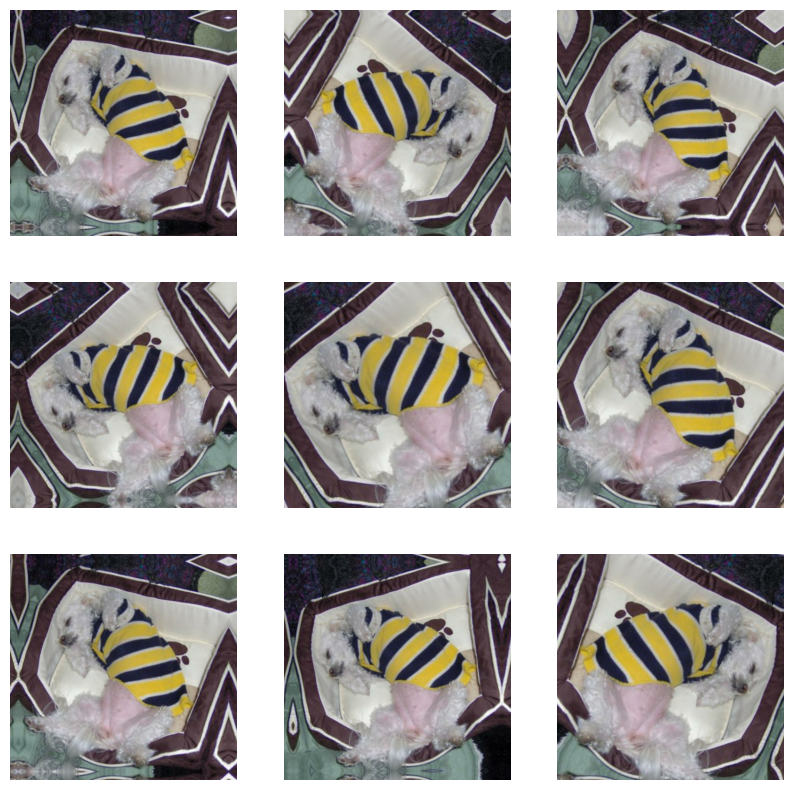

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [ ]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_of_classes, name="outputs")
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
epochs = 10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
399/399 [==============================] - 1802s 5s/step - loss: 1.3811 - accuracy: 0.3312 - val_loss: 1.3267 - val_accuracy: 0.3451
Epoch 2/10
399/399 [==============================] - 87s 217ms/step - loss: 1.3338 - accuracy: 0.3451 - val_loss: 1.3239 - val_accuracy: 0.3396
Epoch 3/10
399/399 [==============================] - 87s 217ms/step - loss: 1.3258 - accuracy: 0.3564 - val_loss: 1.3519 - val_accuracy: 0.3430
Epoch 4/10
399/399 [==============================] - 84s 208ms/step - loss: 1.3209 - accuracy: 0.3655 - val_loss: 1.2982 - val_accuracy: 0.3863
Epoch 5/10
399/399 [==============================] - 110s 273ms/step - loss: 1.3088 - accuracy: 0.3797 - val_loss: 1.2967 - val_accuracy: 0.3882
Epoch 6/10
399/399 [==============================] - 85s 210ms/step - loss: 1.2910 - accuracy: 0.3981 - val_loss: 1.2740 - val_accuracy: 0.4188
Epoch 7/10
399/399 [==============================] - 88s 219ms/step - loss: 1.2837 - accuracy: 0.4076 - val_loss: 1.2617 - val_ac

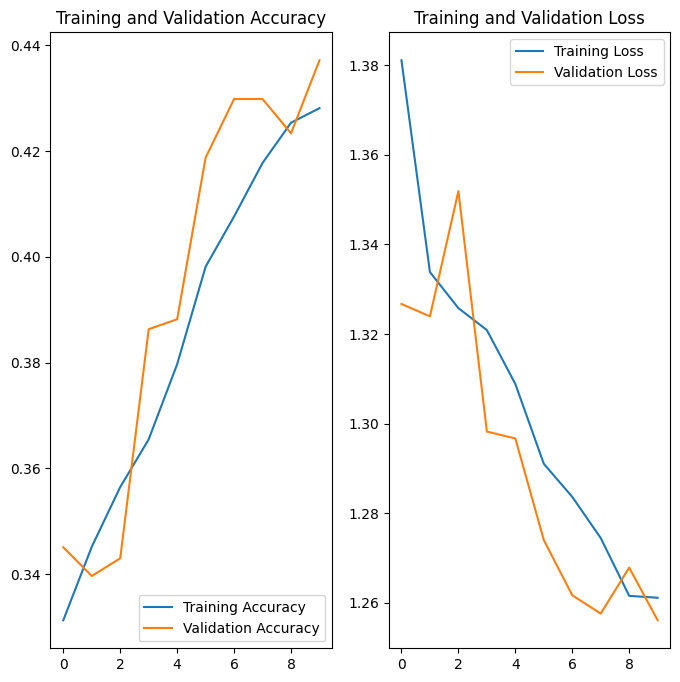

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()